In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pip install matplotlib seaborn

In [8]:
file_path = 'COVID-19 Coronavirus.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [9]:
print("Original column names:", data.columns)

Original column names: Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases/1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')


In [10]:
data.columns = data.columns.str.replace(' ', '_').str.replace(' ', '_').str.replace('/', '_')

In [11]:
print("Cleaned column names:", data.columns)

Cleaned column names: Index(['Country', 'Other_names', 'ISO_3166-1_alpha-3_CODE', 'Population',
       'Continent', 'Total_Cases', 'Total_Deaths', 'Tot_Cases_1M_pop',
       'Tot_Deaths_1M_pop', 'Death_percentage'],
      dtype='object')


In [12]:
median_death_percentage = data['Death_percentage'].median()
data['High_Death_Rate'] = (data['Death_percentage'] > median_death_percentage).astype(int)

In [15]:
features = ['Population', 'Continent', 'Total_Cases', 'Total_Deaths', 'Tot_Cases_1M_pop', 'Tot_Deaths_1M_pop']
X = data[features]
y = data['High_Death_Rate']

In [22]:
numeric_features = ['Population', 'Total_Cases', 'Total_Deaths', 'Tot_Cases_1M_pop', 'Tot_Deaths_1M_pop']
categorical_features = ['Continent']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [25]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        26
           1       0.85      0.89      0.87        19

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

[[23  3]
 [ 2 17]]


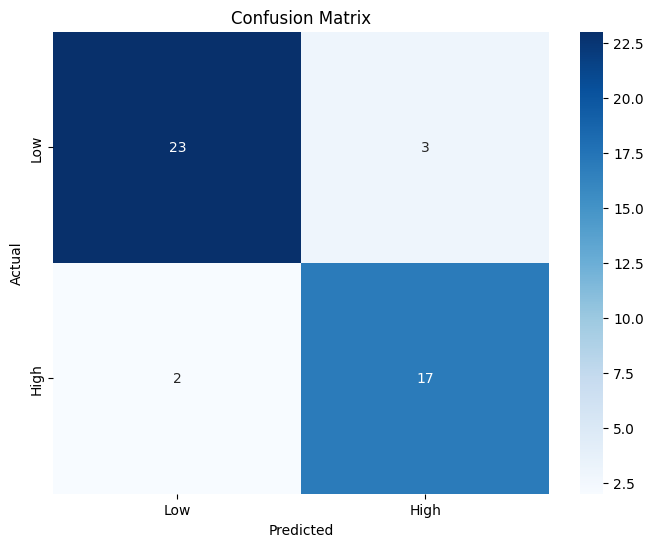

In [29]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

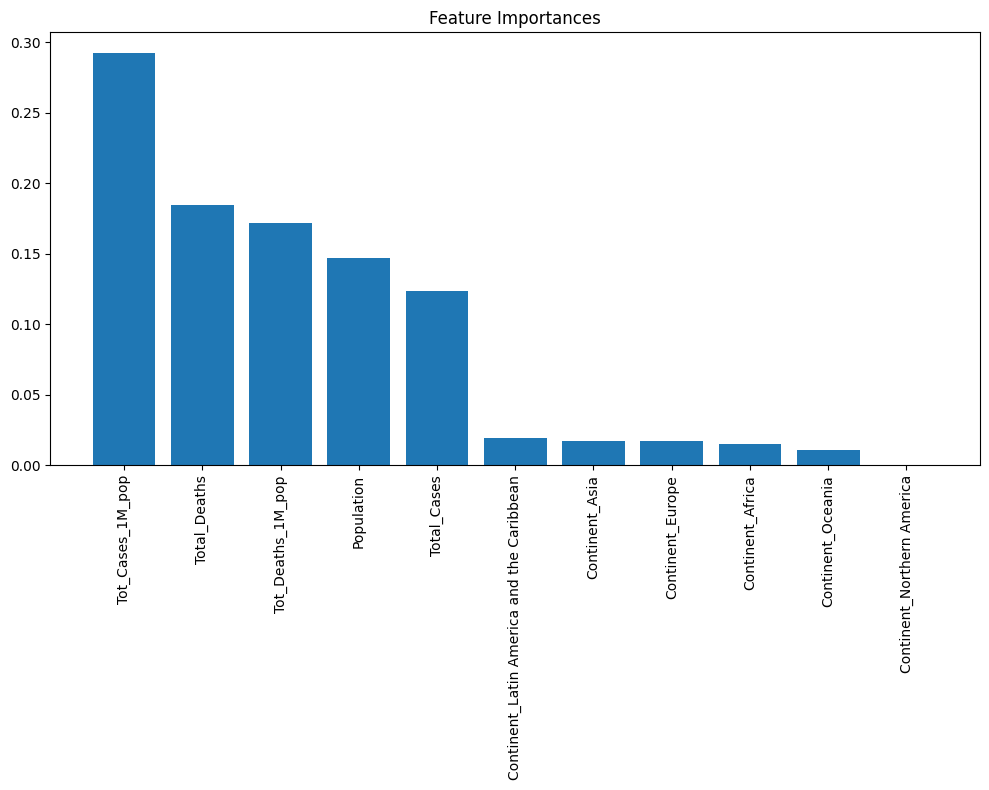

In [31]:
numeric_feature_names = numeric_features
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_feature_names, categorical_feature_names])

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()